In [6]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

In [7]:
annot = pd.read_parquet('../dataset/ocr_dataset/annot.parquet')
imgs = pd.read_parquet('../dataset/ocr_dataset/img.parquet')
img_fns = glob('../dataset/ocr_dataset/train_val_images/train_images/*')

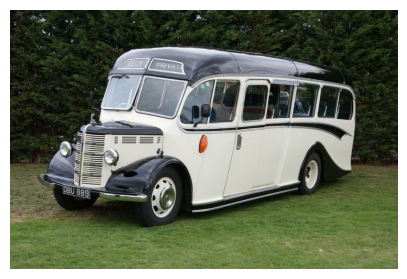

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(plt.imread(img_fns[1]))
ax.axis('off')
plt.show()

In [9]:
image_id = img_fns[0].split('/')[-1].split('.')[0]
annot.query('image_id == @image_id')

,id,image_id,bbox,utf8_string,points,area


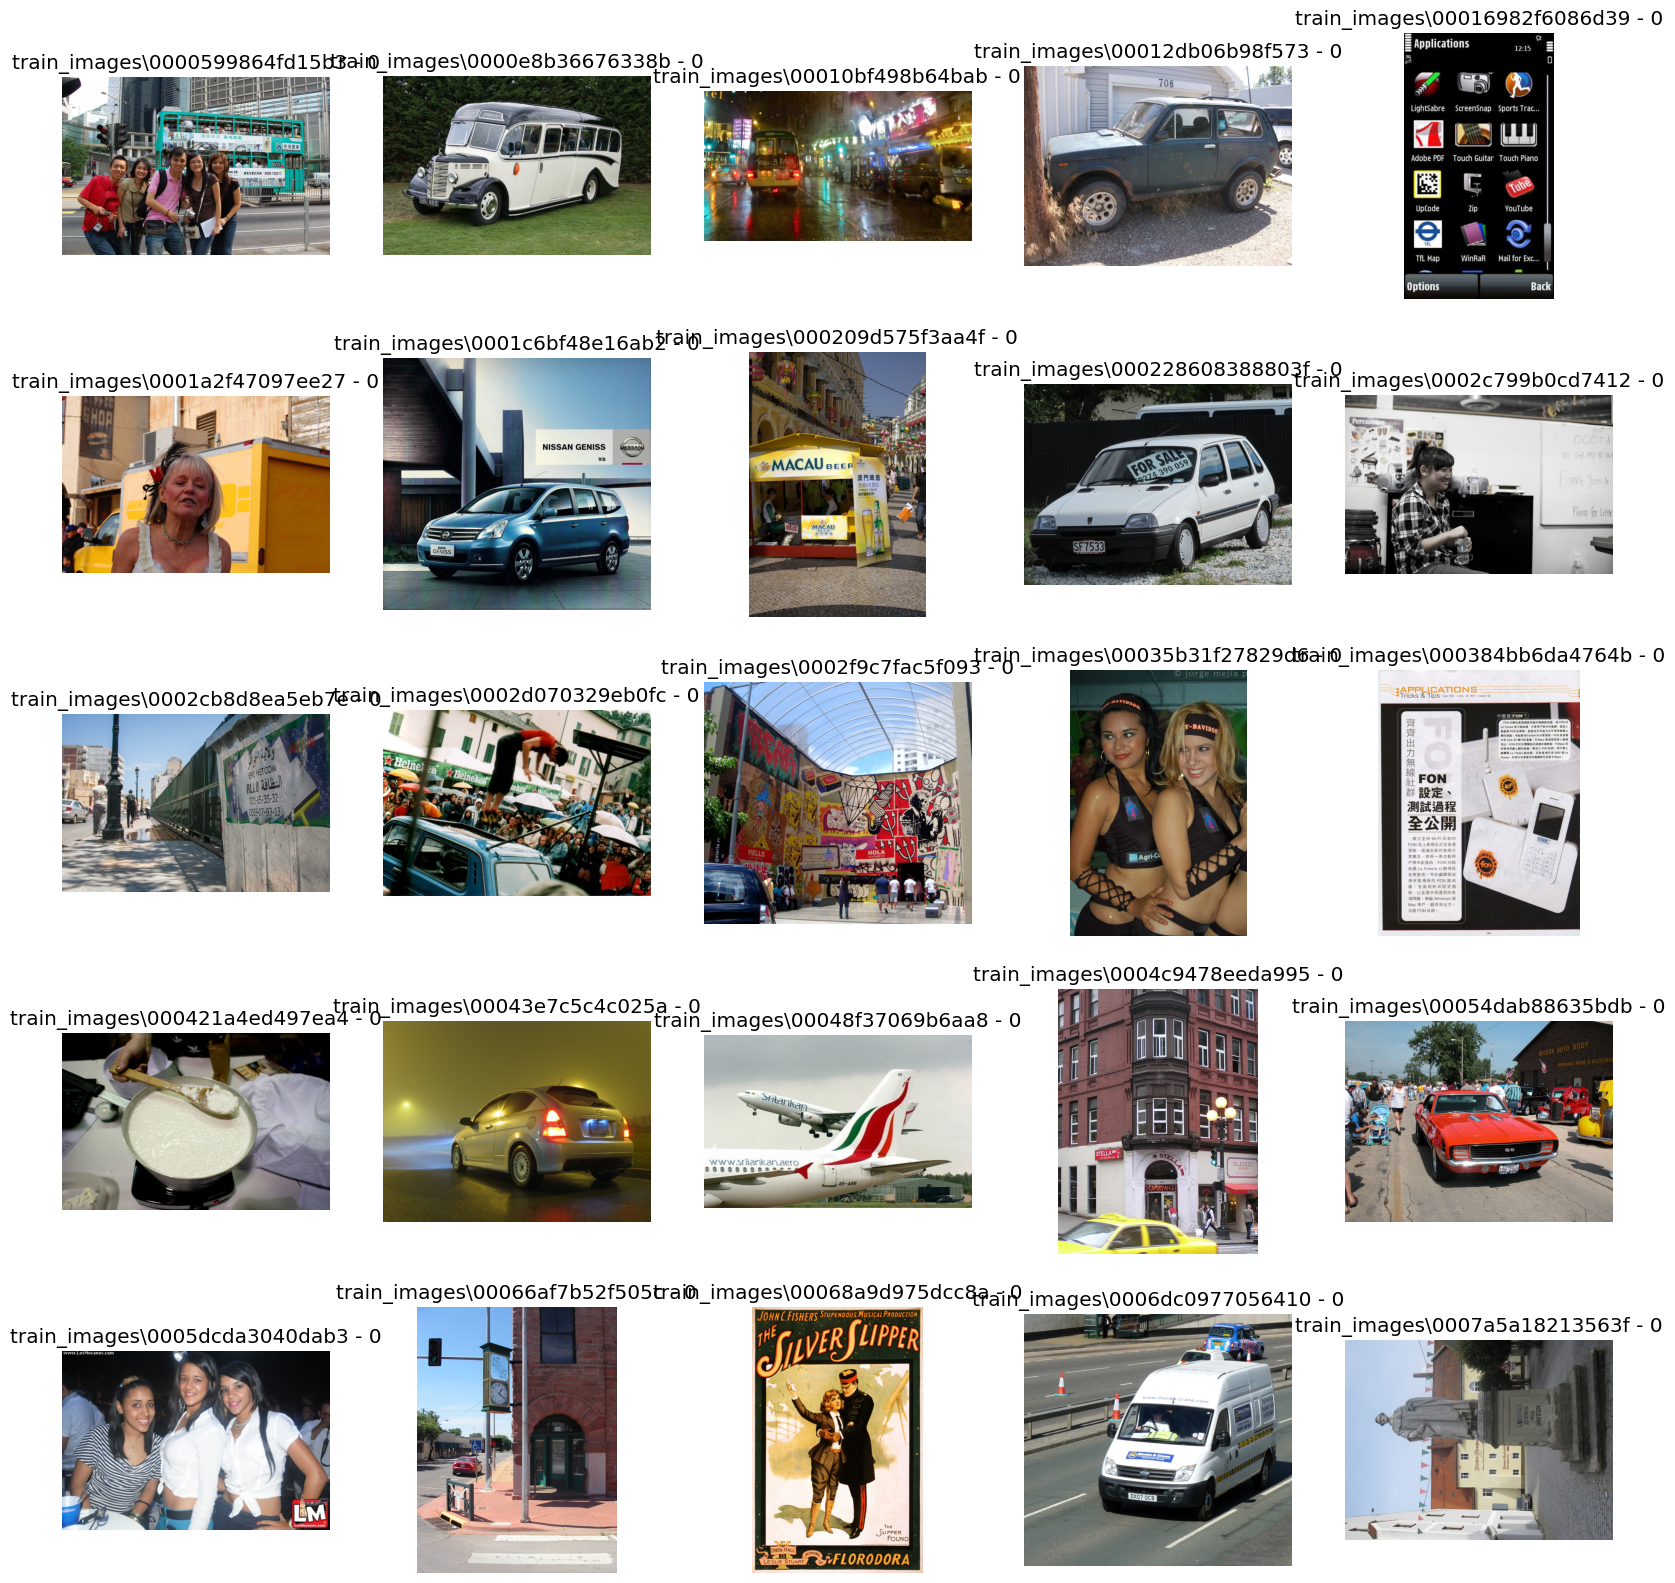

In [10]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
axs = axs.flatten()
for i in range(25):
    axs[i].imshow(plt.imread(img_fns[i]))
    axs[i].axis('off')
    image_id = img_fns[i].split('/')[-1].rstrip('.jpg')
    n_annot = len(annot.query('image_id == @image_id'))
    axs[i].set_title(f'{image_id} - {n_annot}')
plt.show()

In [11]:
import easyocr

reader = easyocr.Reader(['en'], gpu=True)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


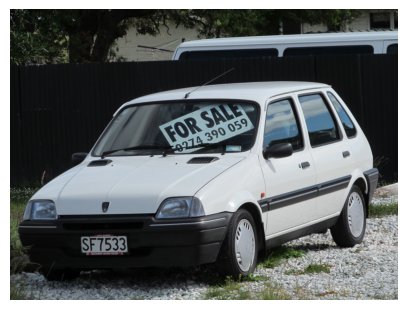

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(plt.imread(img_fns[8]))
ax.axis('off')
plt.show()

In [14]:
results = reader.readtext(img_fns[8])

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [15]:
pd.DataFrame(results, columns=['bbox', 'text', 'conf'])

,bbox,text,conf
0,"[[181, 595], [313, 595], [313, 645], [181, 645]]",SF7533,0.996306
1,"[[488.5623984301982, 264.3435976452972], [613....",SAL],0.599693
2,"[[398.9904649372536, 300.6799763682325], [499....",FOR,0.999022
3,"[[564.0268234150113, 300.3241410735102], [627....",059,0.999991
4,"[[504.4392624013421, 320.9271148816105], [569....",390,0.999995
5,"[[417.28609323645895, 357.51443729458356], [50...",70274,0.400946
